<a href="https://colab.research.google.com/github/Annie-jain/EDA-on-IPL-Data/blob/main/IPL_score_Predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/datasets/data.csv")
data.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


In [4]:
data.shape


(577, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [6]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# **Data preprocessing-finding Nan values**

In [7]:
#shape of data for cleaning the data 
rows = data.shape[0]
columns=data.shape[1]

print("the no. of rows in data is %d"%(rows))
print("the no. of columns in data is %d"%(columns))

the no. of rows in data is 577
the no. of columns in data is 18


In [8]:
#not number values
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1            False
umpire2            False
umpire3             True
dtype: bool

In [9]:
#check for null values
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [10]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


**how many matches (in total ) were played according to this dataset?**

In [11]:
data['id'].count()

577

In [12]:
data['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [13]:
data.iloc[data['win_by_runs'].idxmax()]

id                                         561
season                                    2016
city                                 Bangalore
date                                2016-05-14
team1              Royal Challengers Bangalore
team2                            Gujarat Lions
toss_winner                      Gujarat Lions
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                144
win_by_wickets                               0
player_of_match                 AB de Villiers
venue                    M Chinnaswamy Stadium
umpire1                            AY Dandekar
umpire2                              VK Sharma
umpire3                                    NaN
Name: 560, dtype: object

In [14]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                         13
season                                   2008
city                                   Mumbai
date                               2008-04-27
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
result                                 normal
dl_applied                                  0
winner                        Deccan Chargers
win_by_runs                                 0
win_by_wickets                             10
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
umpire1                             Asad Rauf
umpire2                            SL Shastri
umpire3                                   NaN
Name: 12, dtype: object

In [15]:
data.iloc[data['win_by_wickets'].idxmin()]

id                                           1
season                                    2008
city                                 Bangalore
date                                2008-04-18
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner                   Kolkata Knight Riders
win_by_runs                                140
win_by_wickets                               0
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
umpire1                              Asad Rauf
umpire2                            RE Koertzen
umpire3                                    NaN
Name: 0, dtype: object

In [16]:
data.iloc[data['win_by_runs'].idxmin()]

id                                3
season                         2008
city                          Delhi
date                     2008-04-19
team1              Rajasthan Royals
team2              Delhi Daredevils
toss_winner        Rajasthan Royals
toss_decision                   bat
result                       normal
dl_applied                        0
winner             Delhi Daredevils
win_by_runs                       0
win_by_wickets                    9
player_of_match         MF Maharoof
venue              Feroz Shah Kotla
umpire1                   Aleem Dar
umpire2              GA Pratapkumar
umpire3                         NaN
Name: 2, dtype: object

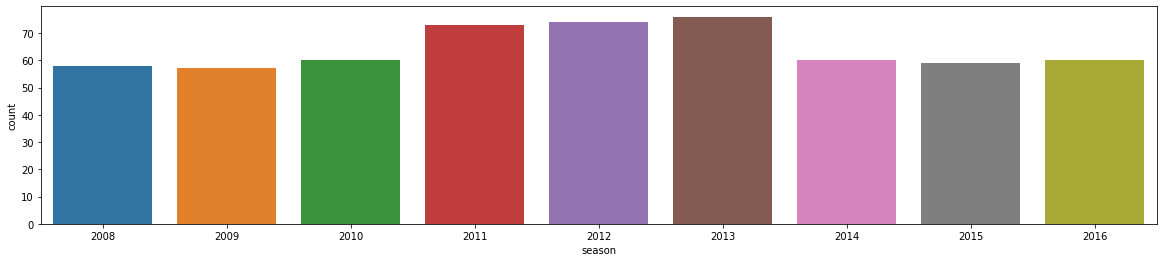

In [17]:
figDim=(20,4)
fig, ax =plt.subplots(figsize=figDim)
sns.countplot(x='season', ax=ax,data=data)
plt.show()

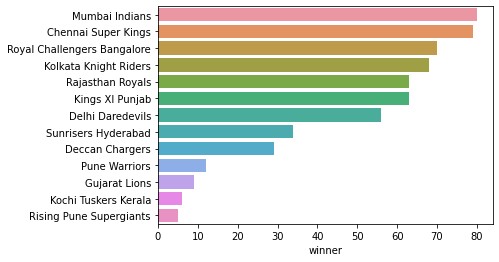

In [18]:
#most winning team
data1= data.winner.value_counts()
sns.barplot(y=data1.index,x=data1)

In [21]:
#probablity of winning the match if the toss is won
prob_win = data['toss_winner']==data['winner']
prob_win.groupby(prob_win).size()

False    286
True     291
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


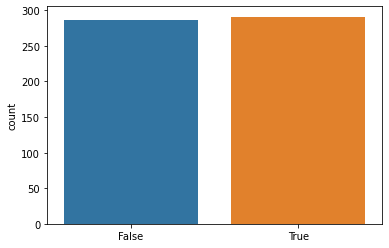

In [22]:
sns.countplot(prob_win)

In [27]:
#highest wins per season
data.groupby('season')['winner'].value_counts()

season  winner                 
2008    Rajasthan Royals           13
        Kings XI Punjab            10
        Chennai Super Kings         9
        Delhi Daredevils            7
        Mumbai Indians              7
                                   ..
2016    Kolkata Knight Riders       8
        Delhi Daredevils            7
        Mumbai Indians              7
        Rising Pune Supergiants     5
        Kings XI Punjab             4
Name: winner, Length: 76, dtype: int64

In [28]:
#man of the match(highest to low) in won matches
data['player_of_match'].value_counts()

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
                  ..
MN Samuels         1
S Badrinath        1
R Bhatia           1
RE Levi            1
BCJ Cutting        1
Name: player_of_match, Length: 187, dtype: int64

In [29]:
#CITY where no. of matches played
data['city'].value_counts()

Mumbai            77
Bangalore         58
Kolkata           54
Delhi             53
Chennai           48
Chandigarh        42
Hyderabad         41
Jaipur            33
Pune              25
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Dharamsala         9
Johannesburg       8
Cuttack            7
Port Elizabeth     7
Cape Town          7
Ranchi             7
Abu Dhabi          7
Sharjah            6
Raipur             6
Kochi              5
Rajkot             5
Kimberley          3
Nagpur             3
East London        3
Bloemfontein       2
Indore             2
Kanpur             2
Name: city, dtype: int64